In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Sales Data

In [2]:
# Read the sales data
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m12/lesson_1/datasets/sales.csv"
df_sales = pd.read_csv(file_path)

# Display sample data
df_sales.head()

,ads,sales
0,21,8350
1,180,22820
2,50,12950
3,195,21105
4,96,15008


<Axes: title={'center': 'Sales per Number of Ads'}, xlabel='ads', ylabel='sales'>

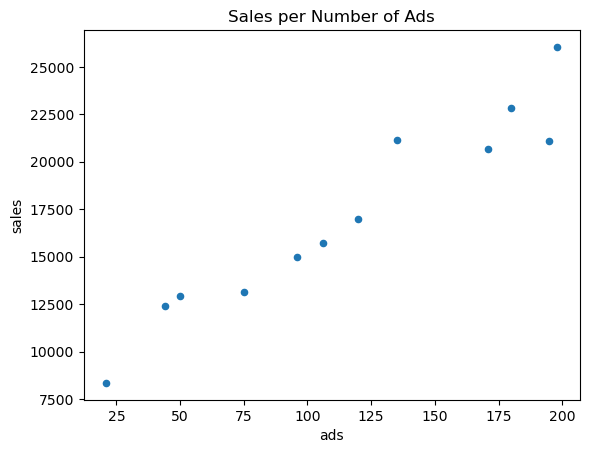

In [3]:
# Create a scatter plot with the sales information
sales_plot = df_sales.plot.scatter(
    x="ads",
    y="sales",
    title="Sales per Number of Ads"
)
sales_plot

## Prepare the Data to Fit the Linear Regression Model

In [4]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = df_sales["ads"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[ 21],
       [180],
       [ 50],
       [195],
       [ 96]])

In [5]:
# Create an array for the dependent variable y with the sales data
y = df_sales["sales"]

## Build the Linear Regression Model

In [6]:
# Create a model with scikit-learn
model = LinearRegression()

In [7]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [8]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [81.34898394]


In [9]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 7764.796945240409


In [10]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 7764.796945240409 + 81.34898393753781X


## Plot the Best Fit Line for the Sales Prediction Model

In [11]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [12]:
# Create a copy of the original data
df_sales_predicted = df_sales.copy()

# Add a column with the predicted sales values
df_sales_predicted["sales_predicted"] = predicted_y_values

# Display sample data
df_sales_predicted.head()

,ads,sales,sales_predicted
0,21,8350,9473.125608
1,180,22820,22407.614054
2,50,12950,11832.246142
3,195,21105,23627.848813
4,96,15008,15574.299403


<Axes: xlabel='ads'>

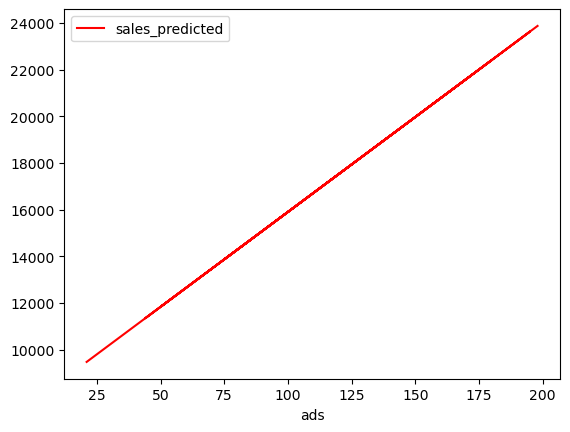

In [13]:
# Create a line plot of the predicted salary values
best_fit_line = df_sales_predicted.plot.line(
    x = "ads",
    y = "sales_predicted",
    color = "red"
)
best_fit_line

<Axes: title={'center': 'Sales per Number of Ads'}, xlabel='ads', ylabel='sales'>

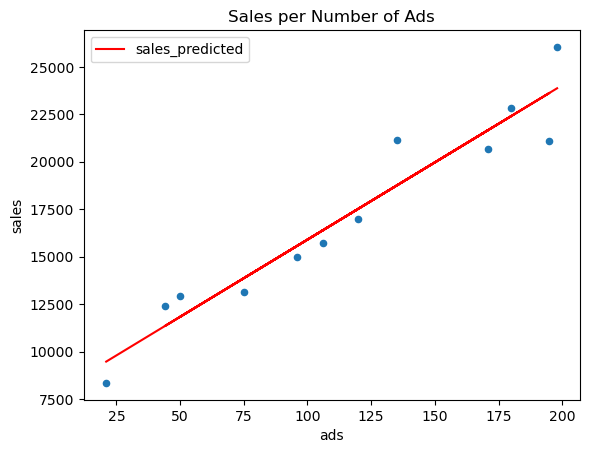

In [14]:
# Superpose the original data and the best fit line
# Create a scatter plot with the sales information
sales_plot = df_sales_predicted.plot.scatter(
    x="ads",
    y="sales",
    title="Sales per Number of Ads"
)

best_fit_line = df_sales_predicted.plot.line(
    x = "ads",
    y = "sales_predicted",
    color = "red",
    ax=sales_plot
)
sales_plot

## Make Manual Predictions

In [15]:
# Display the formula to predict the sales with 100 ads
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 100")

# Predict the sales with 100 ads
y_100 = model.intercept_ + model.coef_[0] * 100

# Display the prediction
print(f"Predicted sales with 100 ads: ${y_100:.2f}")

Model's formula: y = 7764.796945240409 + 81.34898393753781 * 100
Predicted sales with 100 ads: $15899.70


## Make Predictions Using the `predict` Function

In [16]:
# Create an array to predict sales for 100, 150, 200, 250, and 300 ads
X_ads = np.array([100, 150, 200, 250, 300])

# Format the array as a one-column array
X_ads = X_ads.reshape(-1,1)

# Display sample data
X_ads

array([[100],
       [150],
       [200],
       [250],
       [300]])

In [17]:
# Predict sales for 100, 150, 200, 250, and 300 ads
predicted_sales = model.predict(X_ads)

In [18]:
# Create a DataFrame for the predicted sales
df_predicted_sales = pd.DataFrame(
    {
        "ads": X_ads.reshape(1, -1)[0],
        "predicted_sales": predicted_sales
    }
)

# Display data
df_predicted_sales

,ads,predicted_sales
0,100,15899.695339
1,150,19967.144536
2,200,24034.593733
3,250,28102.042930
4,300,32169.492127
